# Predicting Life Expectancy Using Machine Learning

## Importing required libraries and gathering data from hosted environment

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_604f69797b604e4e9791204564fb620d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pok-_dHZWqYaOGJOISozPtZMVSWefYfoZkTUNHofC6PA',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_604f69797b604e4e9791204564fb620d.get_object(Bucket='intern-donotdelete-pr-odcm7gqfom2mi2',Key='datasets_12603_17232_Life Expectancy Data (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Printing data types for understanding 

In [2]:
print(str(df.dtypes))

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


### Checking the count of data present in each columns 

In [3]:
print(str(df.count()))

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness  1-19 years              2904
 thinness 5-9 years                2904
Income composition of resources    2771
Schooling                          2775
dtype: int64


### Printing number of null values corresponding to each column

In [4]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Summarizing the data-frame from data type perspective

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

### Understanding the 7 important factors of each numerical column for statistical analysis

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
df.shape

(2938, 22)

### Understanding the internal correlation metrics of the dataframe

In [8]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


### Using the Seaborn library to generate and visualize the internal co-relation metrics

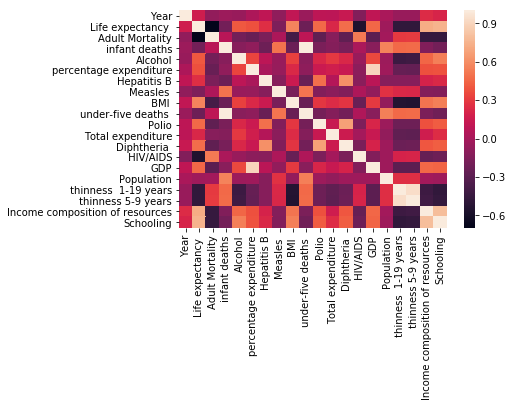

In [9]:
%matplotlib inline
# plot the heatmap
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Preprocessing the categorical columns (Country, Status) using imputation and onehot encoding technique

In [10]:
categoricalColumns=['Country','Status']
impute_categorical = SimpleImputer(strategy = "most_frequent")
onehot_categorical = OneHotEncoder(handle_unknown = "ignore")
categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

In [11]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat',categorical_transformer,categoricalColumns)],remainder="passthrough")

### Pre-Final preprocessing for null value interpolation using polynomial measures of order 2

In [12]:
df.interpolate(method='polynomial',order=2,inplace=True)

In [13]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### Reseting the actual index and shuffling the data set

In [14]:
df = df.sample(frac=1).reset_index(drop=True)

In [15]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Yemen,2007,Developing,63.4,24.0,38,0.05,0.000000,79.000000,13,...,79.0,4.92,79.0,0.1,-3671.109097,-1.220099e+07,13.8,13.8,0.477,8.6
1,Cambodia,2005,Developing,62.9,234.0,18,1.99,62.218173,-46.171056,264,...,82.0,5.84,82.0,1.4,474.223877,1.327210e+05,11.5,11.6,0.470,10.0
2,Swaziland,2012,Developing,56.5,412.0,2,0.01,720.233393,95.000000,0,...,92.0,8.76,95.0,12.2,3851.515470,1.248158e+06,4.8,4.9,0.534,11.3
3,Cambodia,2010,Developing,66.6,192.0,14,2.20,56.884165,89.000000,1156,...,88.0,5.95,89.0,0.5,785.692884,1.438740e+05,11.0,11.3,0.519,10.6
4,El Salvador,2005,Developing,71.0,213.0,3,2.77,440.602704,89.000000,0,...,89.0,7.19,89.0,0.2,2835.281237,6.289610e+05,1.9,1.8,0.644,12.7


### Splitting data to training and testting set and dropping the actual prediction value from the input

In [16]:
x= df.drop('Life expectancy ',axis = 1)
y = df['Life expectancy ']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [17]:
x_test.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2822,Namibia,2014,Developing,242.00000,2,0.01,751.398272,88.00000,477,34.9,...,88.0,8.93,88.0,2.2,5421.343953,2.379920e+05,8.6,8.5,0.632,11.7
744,Congo,2004,Developing,48.00000,9,2.58,0.000000,65.23202,3524,21.2,...,67.0,2.56,67.0,6.3,-1611.666171,-1.700661e+07,9.0,8.6,0.497,9.2
1260,United Arab Emirates,2002,Developing,11.00000,1,1.72,2598.842827,92.00000,53,56.0,...,94.0,2.72,94.0,0.1,31311.359360,-4.401382e+07,5.3,5.0,0.803,12.1
690,Tunisia,2008,Developing,12.00000,3,1.37,53.084517,99.00000,2,54.7,...,99.0,5.63,99.0,0.1,431.932600,1.473360e+05,6.3,6.3,0.701,14.3
1225,Saint Kitts and Nevis,2013,Developing,281.19745,0,8.54,0.000000,97.00000,0,5.2,...,96.0,6.14,96.0,0.1,470.249016,-6.821657e+05,3.7,3.6,0.749,13.4


### Creating a linear regression pipeline for prediction and fitting the data to the model

In [18]:
linearRegressor = LinearRegression()
pipeline= Pipeline(steps=[('preprocessor',preprocessorForCategoricalColumns),('regression',linearRegressor)])
linear_model = pipeline.fit(x_train,y_train)

### Predicting using the test input data

In [19]:
prediction=linear_model.predict(x_test)

### Finding mean absolute error of the model

In [20]:
mean_absolute_error(y_test, prediction)

3.3588865416970872

### Vertically Stacking the actual values and predictions together for visualization

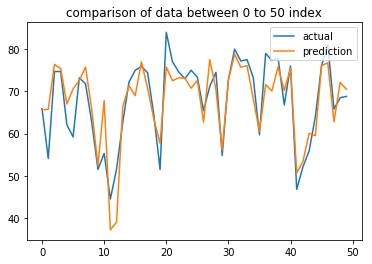

In [21]:
temp=numpy.vstack((y_test,prediction))
plt.plot(temp[0][:50])
plt.plot(temp[1][:50])
plt.legend(["actual", "prediction"], loc ="upper right")
plt.title("comparison of data between 0 to 50 index")
plt.show()

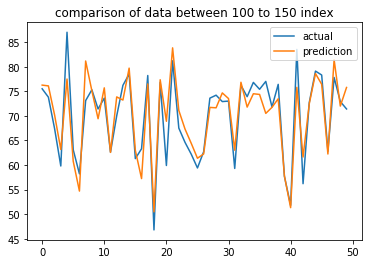

In [22]:
plt.plot(temp[0][100:150])
plt.plot(temp[1][100:150])
plt.legend(["actual", "prediction"], loc ="upper right")
plt.title("comparison of data between 100 to 150 index")
plt.show()

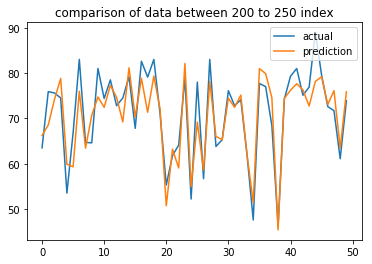

In [23]:
plt.plot(temp[0][200:250])
plt.plot(temp[1][200:250])
plt.legend(["actual", "prediction"], loc ="upper right")
plt.title("comparison of data between 200 to 250 index")
plt.show()

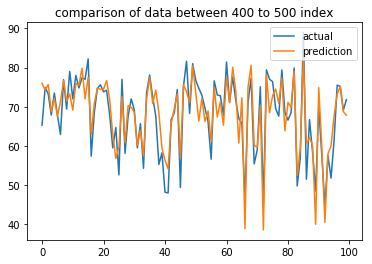

In [24]:
plt.plot(temp[0][400:500])
plt.plot(temp[1][400:500])
plt.legend(["actual", "prediction"], loc ="upper right")
plt.title("comparison of data between 400 to 500 index")
plt.show()

### Finding Root mean squared error of the prediction

In [25]:
print(mean_squared_error(y_test,prediction)**(0.5))

4.404207379005294


### Finding R2 score for statistical analysis

In [26]:
r2_score(y_test,prediction)

0.7796774458444418

## Deploying

In [27]:
!pip install watson-machine-learning-client

In [28]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient


2020-06-13 22:01:46,109 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2020-06-13 22:01:52,169 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: 402. {"trace":"-u7xpxeqf6tib","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}


In [29]:
wml_credentials = {
  "apikey": "tishuRgalw6GGM6-fDbtOleQ33IhF1pw8RMoFxFcspR-",
  "instance_id": "6ac73d6a-f765-4315-a188-21fee82645b3",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [30]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [31]:
#Specify the Properties 
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "heta", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "", 
               client.repository.ModelMetaNames.NAME: "MyModel"}
#Store the Machine Learning Model
model_artifact=client.repository.store_model(linear_model, meta_props=model_props)

In [32]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [33]:
published_model_uid

'f89adad6-a19f-4364-96ed-345a77b82086'

In [34]:
#Deploy the model
created_deployment = client.deployments.create(published_model_uid, name="MyDeployment")

{"trace":"-u7xpxeqf6tib","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}


--------------------------
Deployment creation failed
--------------------------




WMLClientError: Deployment creation failed. Error: 402. {"trace":"-u7xpxeqf6tib","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}

In [ ]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)

In [ ]:
scoring_endpoint